<a href="https://colab.research.google.com/github/balon14/test/blob/main/deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Загрузка библиотек

In [1]:
!pip install keract

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import files
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import plot_model
from tensorflow.keras import backend as K
from tensorflow.keras import activations
from keract import get_activations, display_activations
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

In [3]:
# Различные константы
IMG_WIDTH, IMG_HEIGHT = 28, 28
BATCH_SIZE = 250
EPOCHS = 30
NUM_CLASSES = 10
VALIDATION_SPLIT = 0.2
VERBOSITY = 1

# Загрузка данных

In [19]:
uploaded = files.upload() #просто запускаем и выбираем файл  API токена в проводнике

Saving kaggle.json to kaggle.json


In [20]:
#↓ строка которая активирует наш API токен
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

In [21]:
#↓ добавился восклицательный знак, потому что это колаб
!kaggle competitions download -c mds-ufu-dl-test

mds-ufu-dl-test.zip: Skipping, found more recently modified local copy (use --force to force download)


In [23]:
#↓ "распакуй" + имя архива
!unzip mds-ufu-dl-test.zip

Archive:  mds-ufu-dl-test.zip
replace fmnist_test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

# Загрузка данных в Pandas

In [24]:
train=pd.read_csv("fmnist_train.csv")
test=pd.read_csv("fmnist_test.csv")

## Анализ данных

In [25]:
train.isnull().sum().sum()

424

In [26]:
train = train.fillna(0)

In [27]:
train.isnull().sum().sum()

0

In [28]:
test.isnull().sum().sum()

0

In [29]:
train.head(10)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,Id
0,2,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,9,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,6,0,0,0,0,0,0,0,5,0,...,0.0,0.0,30.0,43.0,0.0,0.0,0.0,0.0,0.0,2
3,0,0,0,0,1,2,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3
4,3,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
5,4,0,0,0,5,4,5,5,3,5,...,8.0,7.0,4.0,3.0,7.0,5.0,0.0,0.0,0.0,5
6,4,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
7,5,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
8,4,0,0,0,0,0,0,3,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8
9,8,0,0,0,0,0,0,0,0,0,...,214.0,166.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9


In [30]:
test.head(10)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,Id
0,0,0,0,0,0,0,0,9,8,0,...,87,56,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,14,53,99,17,...,0,0,0,63,53,31,0,0,0,2
3,0,0,0,0,0,0,0,0,0,161,...,126,140,0,133,224,222,56,0,0,3
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
5,0,0,0,0,0,44,105,44,10,0,...,64,30,0,0,0,0,0,0,0,5
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
7,0,0,0,0,0,0,0,1,0,0,...,136,155,31,0,1,0,0,0,0,7
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
9,0,0,0,0,0,0,0,0,0,0,...,70,28,0,2,0,0,0,0,0,9


In [31]:
y=train['label'].to_numpy()

In [32]:
X = train.iloc[:, 1:785].to_numpy()

In [33]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=15, shuffle=True, stratify=y)

In [34]:
val = test.iloc[:, 0:784].to_numpy()

In [35]:
# Различные константы
IMG_WIDTH, IMG_HEIGHT = 28, 28
BATCH_SIZE = 250
EPOCHS = 50
NUM_CLASSES = 10
VALIDATION_SPLIT = 0.2
VERBOSITY = 1

In [36]:
# Подготавливаем данные.
train_x = train_x.reshape(train_x.shape[0], IMG_WIDTH, IMG_HEIGHT, 1)
test_x = test_x.reshape(test_x.shape[0], IMG_WIDTH, IMG_HEIGHT, 1)
val_x =val.reshape(val.shape[0],IMG_WIDTH, IMG_HEIGHT, 1)

In [37]:
train_x.shape

(13632, 28, 28, 1)

In [38]:
test_x.shape

(3408, 28, 28, 1)

In [39]:
val_x.shape

(10000, 28, 28, 1)

In [40]:
input_shape = (IMG_WIDTH, IMG_HEIGHT, 1)

In [41]:
input_shape

(28, 28, 1)

In [42]:
# Нормализуем данные (0-255 -> 0-1.0).
train_x = train_x.astype('float32')
test_x = test_x.astype('float32')
val_x = val_x.astype('float32')
train_x = train_x / 255
test_x = test_x / 255
val_x = val_x / 255
target_train = tf.keras.utils.to_categorical(train_y, NUM_CLASSES)
target_test = tf.keras.utils.to_categorical(test_y, NUM_CLASSES)

In [43]:
print(train_x[0])

[[[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.00392157]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.70980394]
  [0.827451  ]
  [0.6392157 ]
  [0.46666667]
  [0.42745098]
  [0.4862745 ]
  [0.63529414]
  [0.8117647 ]
  [0.70980394]
  [0.        ]
  [0.        ]
  [0.00392157]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.00784314]
  [0.        ]
  [0.6313726 ]
  [0.93333334]
  [0.8352941 ]
  [0.91764706]
  [0.9647059 ]
  [0.9529412 ]
  [0.9607843 ]
  [0.9019608 ]
  [0.8352941 ]
  [0.9372549 ]
  [0.627451  ]
  [0.        ]
  [0.00392157]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.00392157]
  [0.        ]
  [0.6117647 ]
  [0.9

In [44]:
print(type(train_x))

<class 'numpy.ndarray'>


(28, 28, 1)


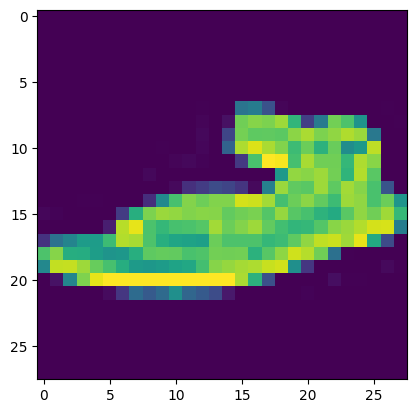

In [45]:
plt.imshow(val_x[30])
print(val_x[0].shape)

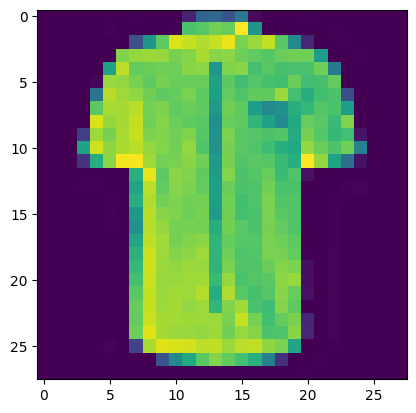

In [46]:
plt.imshow(train_x[2000].reshape(28, 28))

In [47]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Обучение

In [48]:
#создаём модель.
model = Sequential()
model.add(Conv2D(6, kernel_size=(5, 5), strides=(1,1), activation='relu', padding='same', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(10, kernel_size=(5, 5), strides=(1,1), activation='relu', padding='same'))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(NUM_CLASSES, activation='softmax'))

In [50]:
# И обучаем её.
model.compile(
    loss=tf.keras.losses.categorical_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

In [ ]:
model_history = model.fit(
    train_x,
    target_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    verbose=VERBOSITY,
    validation_split=VALIDATION_SPLIT
)

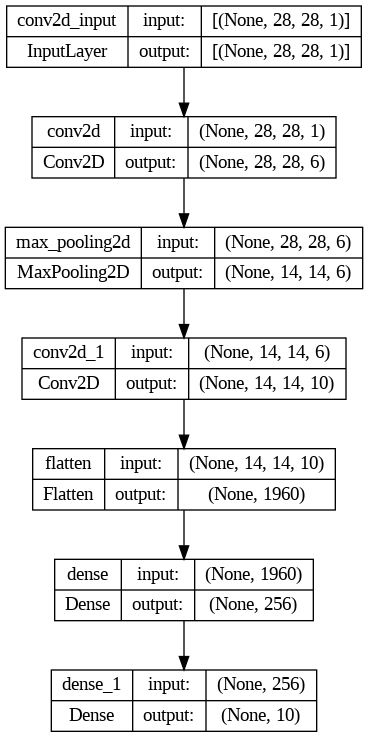

In [51]:
# Визуализируем модель.
plot_model(model, show_shapes = True)

In [52]:
test_loss, test_acc = model.evaluate(test_x,  target_test, verbose=2)

print('\nTest accuracy:', test_acc)

107/107 - 3s - loss: 2.3029 - accuracy: 0.1291 - 3s/epoch - 24ms/step

Test accuracy: 0.1291079819202423


In [53]:
prediction = model.predict(val_x)
prediction.shape

313/313 [==============================] - 4s 13ms/step


(10000, 10)

In [54]:
category=[]
for i in prediction:
    category.append(np.argmax(i))

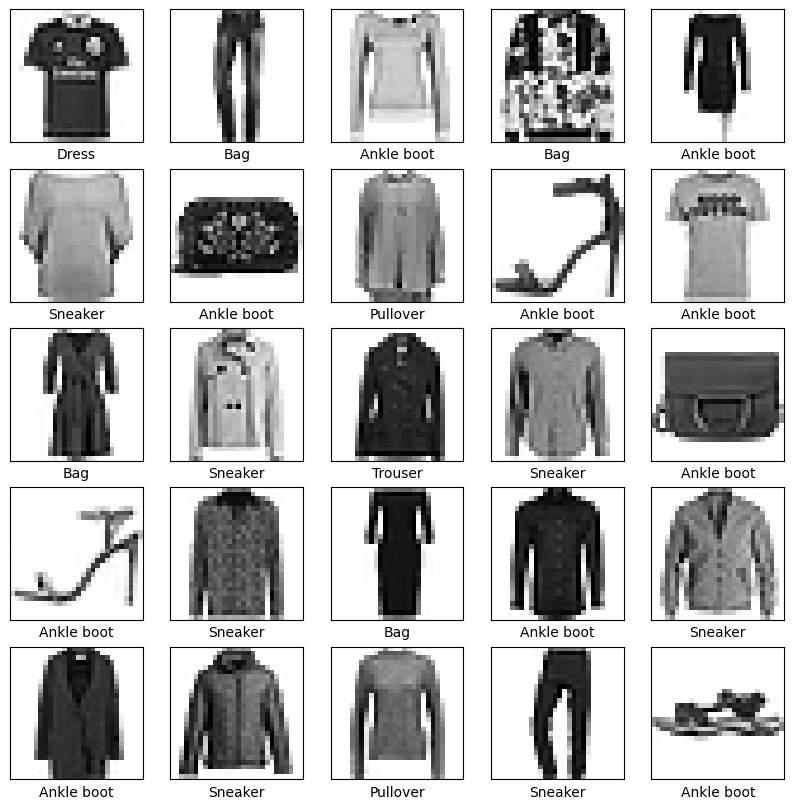

In [55]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(val_x[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[category[i]])
plt.show()

In [56]:
submission = {
    'Id': list(test.Id.values),
    'Category': category
}
solution = pd.DataFrame(submission)
solution.to_csv('submission_my.csv',index=False)

In [57]:
!kaggle competitions submit -c mds-ufu-dl-test -f submission_my.csv -m "Message" 

100% 67.3k/67.3k [00:00<00:00, 408kB/s]
Successfully submitted to [MDS-UFU-DL-TEST] Построение классификатора